## Analysis 1

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def find(word,cities):
    for c in cities:
        if word.lower() in c.lower():
            return True
        
class analysis_1:
    
    def __init__(self,farmer_file,startup_file):
        
        self.farmers_market_df  = pd.read_csv(farmer_file)
        self.startup_df  = pd.read_csv(startup_file)
        self.credits_dct = {}
        self.top_cities = []
        
        
        for x,y in self.startup_df.iterrows():
            if len(self.top_cities)==5:
                break
            else:
                if y['country'].strip()=='United States':
                    self.top_cities.append(y['city'].strip().lower())
        for x,y in self.farmers_market_df.iterrows():
            try:
                if y['city'].strip().lower() not in self.credits_dct and find(y['city'].strip().lower(),self.top_cities):
                    if y['Credit'] == 'Y':
                        self.credits_dct[y['city'].strip().lower()] = 1
                    else:
                        self.credits_dct[y['city'].strip().lower()] = 0
                        
                elif find(y['city'].strip().lower(),self.top_cities):
                    if y['Credit'] == 'Y':
                        self.credits_dct[y['city'].strip().lower()] += 1
                    else:
                        self.credits_dct[y['city'].strip().lower()] += 0
            except:
                pass
            
    def line_plot(self):
        new_cred = {k: v for k, v in sorted(self.credits_dct.items(), key=lambda item: item[1],reverse=True)[:5]}
        x = list(new_cred.keys())
        y = list(new_cred.values())
        plt.xticks(rotation=45, ha='right')
        plt.plot(x,y)
        plt.ylabel('Credits available')
        plt.xlabel('Cities')
        plt.savefig("figures/fig1.PNG")
        plt.show()
    
    def bar_plot(self):
        new_cred = {k: v for k, v in sorted(self.credits_dct.items(), key=lambda item: item[1],reverse=True)[:5]}
        x = list(new_cred.keys())
        y = list(new_cred.values())
        palette = list(reversed(sns.color_palette('mako',as_cmap=False)))
        plt.bar(x,y,color = palette)
        plt.ylabel('Cities')
        plt.xlabel('Credits available ')
        plt.savefig("figures/fig2.PNG")
        plt.show()
        

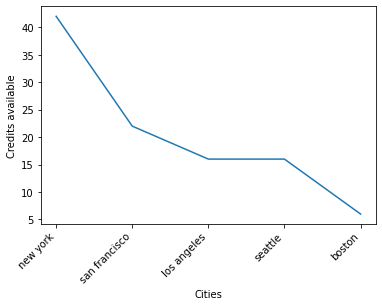

In [12]:
credit_availibility = analysis_1('farmers_markets_usda.csv','Best Cities for Startups.csv')
credit_availibility.line_plot()

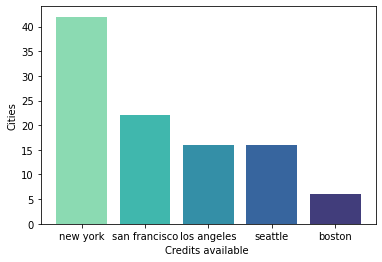

In [13]:
credit_availibility.bar_plot()

## Analysis 2

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def find(word,cities):
    for c in cities:
        if word.lower() in c.lower() and len(word)>4:
            return True
        
class analysis_2:
    
    def __init__(self,ppp_file,startup_file):
        
        self.ppp  = open(ppp_file,'r')
        self.startup_df  = pd.read_csv(startup_file)
        self.borrower_dct = {}
        self.top_cities = []
        
        for x,y in self.startup_df.iterrows():
            if len(self.top_cities)==5:
                break
            else:
                if y['country'].strip()=='United States':
                    self.top_cities.append(y['city'].strip().lower())
        
        for line in self.ppp:
            ln = line.split('|')
            city = ln[-9].strip().lower()
            if find(city,self.top_cities):
                if city not in self.borrower_dct:
                    self.borrower_dct[city] = 1
                else:
                    self.borrower_dct[city] += 1
        print(self.borrower_dct)
    def line_plot(self):
        new_cred = {k: v for k, v in sorted(self.borrower_dct.items(), key=lambda item: item[1],reverse=True)[:5]}
        x = list(new_cred.keys())
        y = list(new_cred.values())
        plt.xticks(rotation=45, ha='right')
        plt.plot(x,y)
        plt.ylabel('Loan taken')
        plt.xlabel('Cities')
        plt.savefig("figures/fig3.PNG")
        plt.show()
    
    def bar_plot(self):
        new_cred = {k: v for k, v in sorted(self.borrower_dct.items(), key=lambda item: item[1],reverse=True)[:5]}
        x = list(new_cred.keys())
        y = list(new_cred.values())
        palette = list(reversed(sns.color_palette('mako',as_cmap=False)))
        plt.bar(x,y,color = palette)
        plt.ylabel('Cities')
        plt.xlabel('Loan taken')
        plt.savefig("figures/fig4.PNG")
        plt.show()

{'san francisco': 24463, 'los angeles': 14887, 'new york': 11087, 'seattle': 3866, 'boston': 1022}


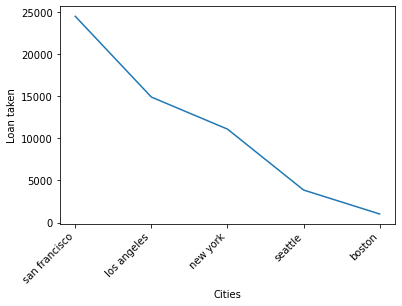

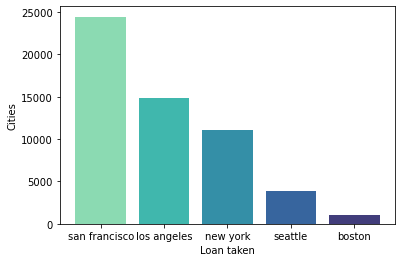

In [15]:
ppp_loan = analysis_2('ppp_loans.csv','Best Cities for Startups.csv')
ppp_loan.line_plot()
ppp_loan.bar_plot()